<a href="https://colab.research.google.com/github/PrachitiSParulekar/Machine-learning-algorithm-from-scratch/blob/main/Day_9_Random_Forest_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Generate a synthetic binary classification dataset
X, y = make_classification(
    n_samples=1000,     # number of data points
    n_features=10,      # number of features
    n_informative=5,    # number of informative features
    n_redundant=2,      # number of redundant features
    n_classes=2,        # binary classification
    random_state=42
)

# See the shape
print(X.shape, y.shape)

(1000, 10) (1000,)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [4]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [5]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.945

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       112
           1       0.93      0.94      0.94        88

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.95      0.94      0.95       200



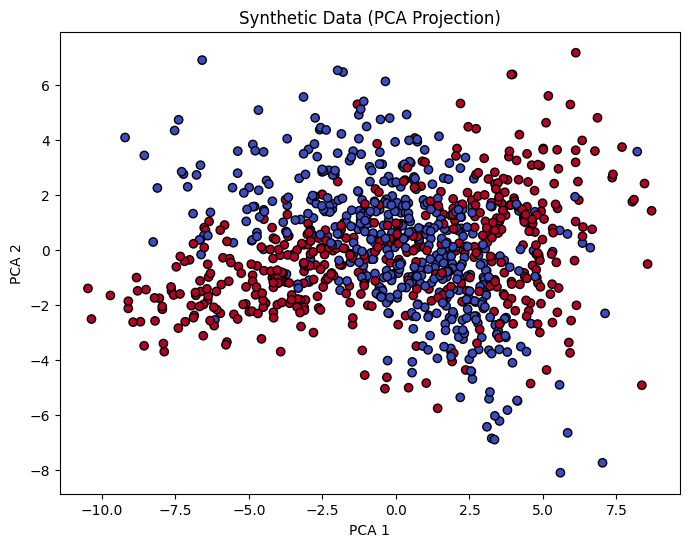

In [6]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', edgecolor='k')
plt.title("Synthetic Data (PCA Projection)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

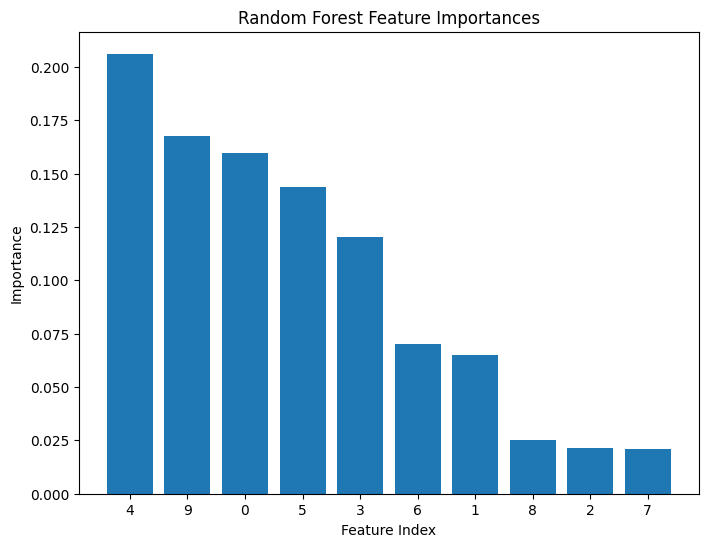

In [7]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8,6))
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), indices)
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importances')
plt.show()

In [8]:
!apt-get install graphviz && pip install graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.


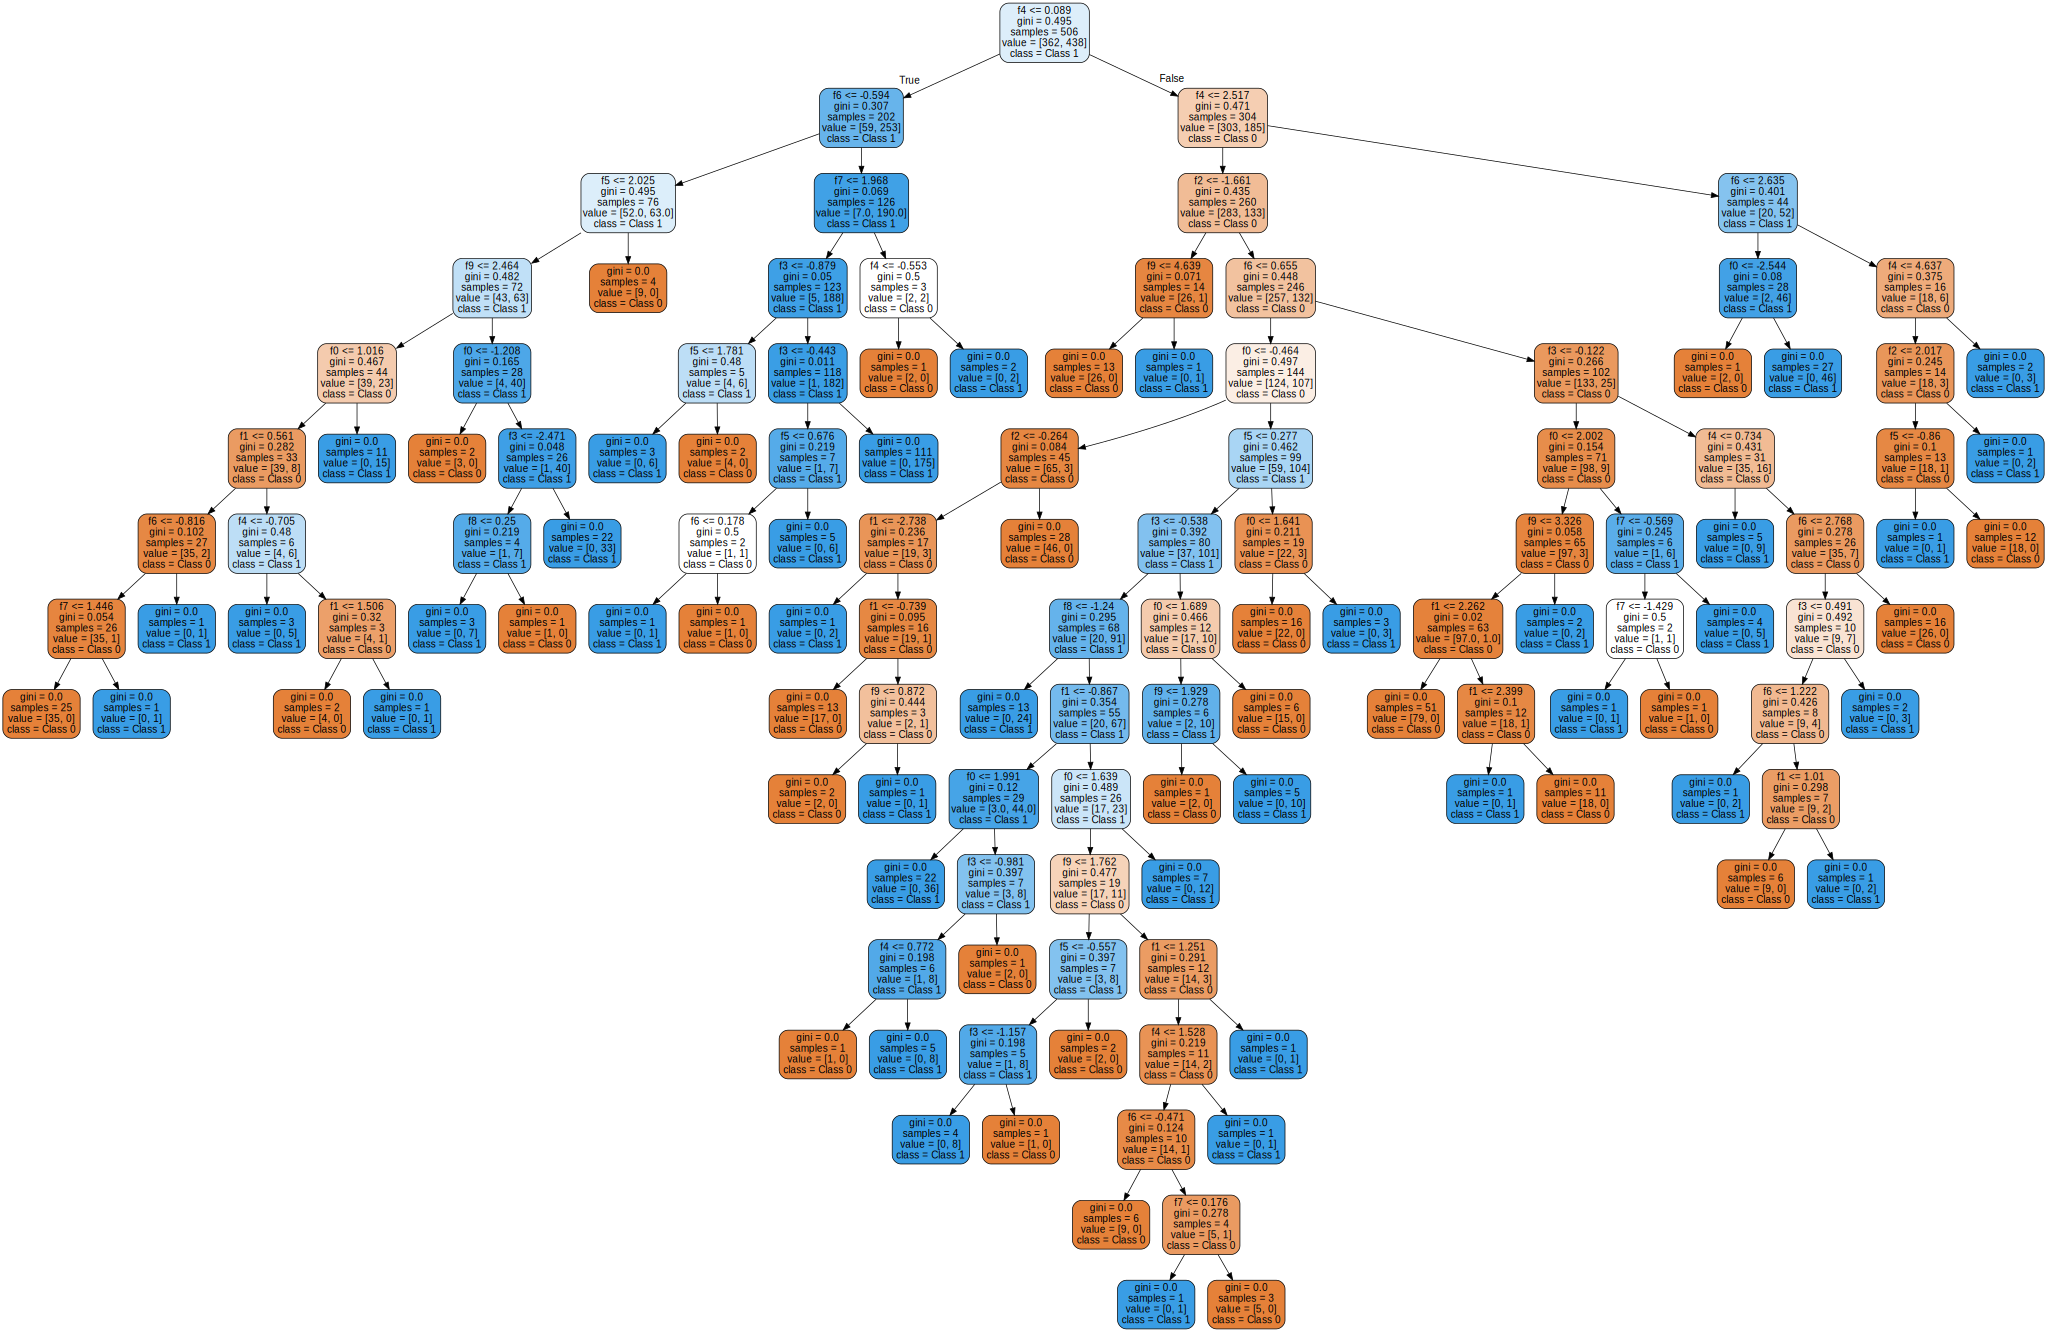

<Figure size 1200x800 with 0 Axes>

In [11]:
from sklearn.tree import export_graphviz
from graphviz import Source

plt.figure(figsize=(12, 8))
# Visualize the first tree
estimator = rf.estimators_[0]

export_graphviz(estimator, out_file="tree.dot", feature_names=[f"f{i}" for i in range(X.shape[1])],
                class_names=["Class 0", "Class 1"], rounded=True, filled=True)

# Display as SVG
with open("tree.dot") as f:
    dot_graph = f.read()
display(Source(dot_graph))
